# Exploratory Data Analysis

Ce notebook présente une analyse descriptive du jeu de données final construit dans `0_data_collection_cleaning.ipynb`.  
Il vise à explorer la distribution des variables, à identifier d’éventuelles valeurs extrêmes et à examiner les relations entre pollution atmosphérique et niveau de vie.

## Objectif de l’analyse exploratoire

L’analyse exploratoire a pour objectif de mettre en évidence des régularités, des contrastes et des hétérogénéités spatiales dans les données.  
Elle permet de formuler des hypothèses sur le lien entre pollution et niveau de vie, ainsi que d’identifier des mécanismes potentiels, qui seront ensuite approfondis et testés dans la partie de modélisation.


In [17]:
#On charge le fichier des données finales (communales) nettoyés
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = Path("../data")
PROC_DIR = DATA_DIR / "processed"

df = pd.read_csv(PROC_DIR / "df_final.csv")
df.head()


Commune  pm10  pm25   no2         Commune_clean  CODGEO  \
0  ABBEVILLE LA RIVIERE  15.0   8.0   8.0  ABBEVILLE LA RIVIERE   91001   
1              ABLEIGES  18.0   9.0  13.0              ABLEIGES   95002   
2                 ABLIS  15.0   8.0  13.0                 ABLIS   78003   
3       ABLON SUR SEINE  17.0  10.0  24.0       ABLON SUR SEINE   94001   
4               ACHERES  19.0  10.0  21.0               ACHERES   78005   

   NBPERS19   Q219     D119   GI19  poverty_index  
0       336  24590      NaN    NaN            NaN  
1      1153  28270      NaN    NaN            NaN  
2      3563  25970  16030.0  0.208       0.617251  
3      5741  22780  11530.0  0.270       0.506146  
4     22032  22260  12030.0  0.257       0.540431

## Step 1 — Vue d'ensemble + qualité des données





In [18]:
df.shape, df.columns
df.head(5)

Commune  pm10  pm25   no2         Commune_clean  CODGEO  \
0  ABBEVILLE LA RIVIERE  15.0   8.0   8.0  ABBEVILLE LA RIVIERE   91001   
1              ABLEIGES  18.0   9.0  13.0              ABLEIGES   95002   
2                 ABLIS  15.0   8.0  13.0                 ABLIS   78003   
3       ABLON SUR SEINE  17.0  10.0  24.0       ABLON SUR SEINE   94001   
4               ACHERES  19.0  10.0  21.0               ACHERES   78005   

   NBPERS19   Q219     D119   GI19  poverty_index  
0       336  24590      NaN    NaN            NaN  
1      1153  28270      NaN    NaN            NaN  
2      3563  25970  16030.0  0.208       0.617251  
3      5741  22780  11530.0  0.270       0.506146  
4     22032  22260  12030.0  0.257       0.540431

In [19]:
df.describe(include="all").T.head(20)


count unique       top freq          mean           std  \
Commune          1125   1125  HOUILLES    1           NaN           NaN   
pm10           1120.0    NaN       NaN  NaN     16.695536      2.378256   
pm25           1121.0    NaN       NaN  NaN       9.03479      1.093668   
no2            1122.0    NaN       NaN  NaN     14.209447      7.729583   
Commune_clean    1125   1125  HOUILLES    1           NaN           NaN   
CODGEO         1125.0    NaN       NaN  NaN  83735.801778   7717.426505   
NBPERS19       1125.0    NaN       NaN  NaN   7827.003556  15411.023147   
Q219           1125.0    NaN       NaN  NaN  26249.048889   4179.662577   
D119            480.0    NaN       NaN  NaN  13583.041667   2574.584937   
GI19            480.0    NaN       NaN  NaN      0.264477      0.041819   
poverty_index   480.0    NaN       NaN  NaN      0.535526      0.050882   

                   min       25%      50%       75%       max  
Commune            NaN       NaN      NaN       NaN       NaN  
pm10              14.0      15.0     16.0      18.0      27.0  
pm25               8.0       8.0      9.0       9.0      15.0  
no2                5.0       8.0     13.0      18.0      49.0  
Commune_clean      NaN       NaN      NaN       NaN       NaN  
CODGEO         77001.0   77321.0  78314.0   91634.0   95682.0  
NBPERS19         101.0     561.0   1356.0    6718.0  117954.0  
Q219           13960.0   23800.0  26010.0   28280.0   46180.0  
D119            7280.0   11730.0  13795.0   15385.0   20870.0  
GI19             0.191   0.23575    0.257     0.284     0.507  
poverty_index  0.32395  0.498692  0.53471  0.571912  0.671518

In [20]:
(df.isna().mean().sort_values(ascending=False) * 100).head(15)


D119             57.333333
GI19             57.333333
poverty_index    57.333333
pm10              0.444444
pm25              0.355556
no2               0.266667
Commune           0.000000
Commune_clean     0.000000
CODGEO            0.000000
NBPERS19          0.000000
Q219              0.000000
dtype: float64

### Valeurs manquantes

Les variables de pollution présentent très peu de valeurs manquantes (moins de 0,5 %),
ce qui permet de les exploiter sans précaution particulière.

En revanche, certaines variables socio-économiques issues de Filosofi
(D119 et GI19) comportent environ 57 % de valeurs manquantes.
Cela s’explique par les règles de diffusion de l’INSEE, qui ne publie pas ces indicateurs
pour l’ensemble des communes, notamment lorsque les effectifs sont trop faibles.

Ces valeurs manquantes seront prises en compte dans les analyses ultérieures,
sans imputation arbitraire.


In [21]:
import plotly.express as px

fig = px.histogram(
    df,
    x="pm25",
    nbins=30,
    title="Distribution des concentrations en PM2.5",
    labels={"pm25": "PM2.5 (µg/m³)"}
)
fig.show()


In [22]:
fig = px.histogram(
    df,
    x="pm10",
    nbins=30,
    title="Distribution des concentrations en PM10",
    labels={"pm10": "PM10 (µg/m³)"}
)
fig.show()

In [23]:
fig = px.histogram(
    df,
    x="no2",
    nbins=30,
    title="Distribution des concentrations en NO2",
    labels={"no2": "NO2 (µg/m³)"}
)
fig.show()

In [24]:
fig = px.histogram(
    df,
    x="poverty_index",
    nbins=30,
    title="Distribution des indices de pauvreté",
    labels={"poverty_index": "Indice de pauvreté"}
)
fig.show()

Les distributions des concentrations de PM2.5 et PM10 sont relativement asymétriques à droite,
avec une majorité de communes présentant des niveaux modérés, mais quelques communes plus exposées.
Cela suggère une hétérogénéité spatiale de la pollution en Île-de-France, cohérente avec la présence
de zones urbaines denses et d’axes routiers majeurs.

La distribution du NO2 est plus étalée, ce qui est attendu car ce polluant est fortement lié
au trafic routier, très variable selon les communes.


## Step 2 — Les relations entre les indicateurs de niveau de vie et la pollution


In [25]:
fig = px.scatter(
    df,
    x="poverty_index",
    y="pm25",
    labels={
        "poverty_index": "Indice de pauvreté",
        "pm25": "PM2.5 (µg/m³)"
    },
    title="PM2.5 et indice de pauvreté par commune"
)

fig.show()



Ce nuage de points met en relation la concentration moyenne en PM2.5 et l’indice de pauvreté
au niveau communal. On observe une légère tendance positive : les communes présentant
un indice de pauvreté plus élevé semblent, en moyenne, légèrement plus exposées aux particules fines.

Cependant, la dispersion reste importante, ce qui indique que le niveau de pollution
n’est pas uniquement déterminé par le niveau de vie. D’autres facteurs, tels que
la densité urbaine, la proximité des axes routiers ou des zones d’activité,
jouent probablement un rôle majeur. 

Cette première analyse descriptive suggère l’existence d’inégalités environnementales,
même si celles-ci restent modérées à l’échelle communale. 

Il convient toutefois de rappeler que cette analyse reste descriptive et qu’elle ne permet pas, à ce stade, d’établir un lien causal entre niveau de pauvreté et exposition à la pollution.



In [26]:
px.scatter(
    df,
    x="poverty_index",
    y="no2",
    labels={
        "poverty_index": "Indice de pauvreté",
        "no2": "NO2 (µg/m³)"
    },
    title="NO2 et indice de pauvreté par commune"
)


Contrairement aux particules fines, la relation entre le NO2 et l’indice de pauvreté
semble négative. Les communes les plus pauvres présentent, en moyenne,
des concentrations plus faibles de NO2.

Ce résultat s’explique par la nature du NO2, principalement émis par le trafic routier.
Les communes les plus exposées sont généralement les zones urbaines denses
et centrales, qui sont aussi souvent plus favorisées économiquement.
Cette observation est cohérente avec la littérature sur la pollution liée au trafic.


Les nuages de points ne mettent pas en évidence de relation linéaire claire entre pollution et niveau de vie. La forte densité des observations et la faible variance de certains polluants rendent ces graphiques peu lisibles. Afin de mieux comparer les niveaux de pollution entre groupes de communes, nous utilisons ensuite une analyse par quantiles.

In [27]:
df[["pm25", "pm10", "no2", "poverty_index", "Q219", "GI19"]].corr()

vars_heatmap = ["pm25", "no2", "Q219", "poverty_index", "GI19"]
corr = df[vars_heatmap].corr()

# Palette divergente chaude (orange pastel -> blanc -> rouge)
warm_diverging = [
    [0.0,  "#FFE8C2"],  # orange très clair (corr -1)
    [0.25, "#FFD08A"],  # orange clair
    [0.5,  "#FFF7EC"],  # quasi blanc (corr 0)
    [0.75, "#F59C7D"],  # rouge/orange
    [1.0,  "#B30000"],  # rouge foncé (corr +1)
]

fig = px.imshow(
    corr,
    text_auto=".2f",
    zmin=-1, zmax=1,
    color_continuous_scale=warm_diverging,
    title="Corrélations entre pollution et indicateurs socio-économiques"
)

fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    coloraxis_colorbar=dict(title="Corrélation"),
)

fig.show()



## Step 3 - Analyse descriptive : pollution et indicateurs socio-économiques

Cette section propose une analyse exploratoire du lien entre pollution atmosphérique et niveau de vie au niveau communal en Île-de-France.  
Nous mobilisons deux indicateurs de pollution (PM2.5 et NO2) ainsi que plusieurs indicateurs socio-économiques issus des données INSEE : le revenu médian (Q219), un indice de pauvreté construit à partir des données Filosofi, et l’indice de Gini (GI19), mesurant les inégalités de revenus.


### 1. Corrélations entre polluants

La matrice de corrélation met en évidence une **forte corrélation positive entre les différents polluants**, en particulier entre les concentrations de PM2.5 et de NO2 (corrélation ≈ 0.81).

Ce résultat suggère que ces polluants reflètent en grande partie une **exposition environnementale commune**, probablement liée à des facteurs structurels tels que :
- la densité urbaine,
- l’intensité du trafic routier,
- la concentration des activités économiques.

Ainsi, bien que les polluants aient des origines physiques différentes, ils capturent ici une dimension similaire de la pollution de l’air en milieu urbain.


### 2. Pollution et revenu médian (Q219)

Les corrélations entre la pollution et le revenu médian sont **faibles et négatives** :
- PM2.5 et revenu médian : corrélation ≈ -0.18
- NO2 et revenu médian : corrélation ≈ -0.03

Ces résultats suggèrent qu’en moyenne, les communes ayant un revenu médian plus élevé tendent à être légèrement moins exposées à la pollution aux particules fines, mais que cet effet reste limité.  
Pour le NO2, la corrélation est quasi nulle, ce qui indique que le revenu médian seul ne permet pas d’expliquer l’exposition à une pollution fortement liée au trafic routier.

Une explication plausible est la **structure territoriale de l’Île-de-France** : certaines communes riches peuvent être très centrales et donc fortement exposées au NO2, tandis que des communes moins favorisées peuvent être plus périphériques et moins exposées à ce type de pollution.


### 3. Pollution et indice de pauvreté

L’indice de pauvreté construit présente des **corrélations négatives relativement fortes avec la pollution** :
- PM2.5 et indice de pauvreté : corrélation ≈ -0.59
- NO2 et indice de pauvreté : corrélation ≈ -0.59

À première vue, ce résultat peut sembler contre-intuitif, car une partie de la littérature sur les inégalités environnementales met en avant une surexposition des populations défavorisées à la pollution.

Toutefois, plusieurs éléments invitent à une **interprétation prudente** :
- l’indice de pauvreté utilisé est un **indicateur construit** (ratio entre deux statistiques de niveau de vie), et non un indicateur standardisé ;
- cet indice est t



In [28]:
df["poverty_group"] = pd.qcut(
    df["poverty_index"],
    q=4,
    labels=["Q1 (moins pauvres)", "Q2", "Q3", "Q4 (plus pauvres)"]
)


In [29]:
px.box(
    df,
    x="poverty_group",
    y="pm25",
    title="PM2.5 selon le niveau de pauvreté des communes"
)

In [30]:
df["income_group"] = pd.qcut(
    df["Q219"],
    q=4,
    labels=["Q1 (revenus faibles)", "Q2", "Q3", "Q4 (revenus élevés)"]
)

px.box(
    df,
    x="income_group",
    y="no2",
    title="NO2 selon le niveau de revenu médian"
)


Le boxplot met en évidence une différence marquée des concentrations de PM2.5 selon le niveau de pauvreté des communes. Les communes les moins pauvres (Q1) présentent en moyenne des niveaux de PM2.5 plus élevés que les communes les plus pauvres (Q4).

Cette observation peut sembler contre-intuitive, mais elle est cohérente avec le fait que les communes les plus favorisées sont souvent plus urbaines et denses, et donc davantage exposées à une pollution de fond liée au trafic et aux activités économiques. À l’inverse, certaines communes plus pauvres peuvent être situées en périphérie ou dans des zones moins denses, avec une exposition moindre aux particules fines.

Ce résultat souligne l’importance de facteurs géographiques et urbains dans l’analyse du lien entre pollution et niveau de vie.

### Limites de l’analyse au niveau communal et motivation du changement d’échelle

L’analyse au niveau communal met en évidence des différences de niveaux de pollution selon le niveau de pauvreté, mais elle reste limitée par l’hétérogénéité interne des communes, en particulier dans les zones urbaines denses.  
En effet, une même commune peut regrouper des quartiers aux profils socio-économiques très contrastés et à des niveaux d’exposition à la pollution très différents.

Afin de mieux capter ces variations locales et d’analyser plus finement le lien entre pollution et niveau de vie, nous poursuivons l’analyse à un niveau infracommunal, en utilisant des carreaux de 200 m × 200 m.  
Ce changement d’échelle permet d’examiner des mécanismes spatiaux qui peuvent être masqués par une agrégation au niveau communal.


## Step 4 - Relation des indicateurs de niveau de vie et de pollution au niveau infracommunal (carreau 200m*200m)

### 1 — Analyse des résultats au niveau infracommunal

Pour cela, la première étape est de créer un seul dataframe réunissant des mesures de pollution de l'air d'Airparif et des mesures de niveau de vie de l'Insee.

In [31]:
import os
import pandas as pd
import geopandas as gpd
from shapely import wkt

def safe_wkt_load(x):
    # wkt.loads attend une string ; si NaN/float → on renvoie None
    if isinstance(x, str) and x.strip():
        try:
            return wkt.loads(x)
        except Exception:
            return None
    return None

def charger_donnees_pollution():
    dossier_raw = os.path.join("..", "data", "raw")
    nom_base = "donnees_pollutions_carreaux"

    # On cherche le fichier (qu'il soit .txt, .csv ou sans extension)
    chemin_fichier = None
    for ext in ["", ".txt", ".csv"]:
        test_path = os.path.join(dossier_raw, nom_base + ext)
        if os.path.exists(test_path):
            chemin_fichier = test_path
            break

    if chemin_fichier:
        print(f"Fichier détecté et chargement en cours : {chemin_fichier}")

        df = pd.read_csv(chemin_fichier)

        # Conversion des géométries (robuste)
        print("Conversion des géométries en cours...")
        df["geometry"] = df["geometry"].apply(safe_wkt_load)

        # On enlève les lignes sans géométrie valide
        n_before = len(df)
        df = df[df["geometry"].notna()].copy()
        print(f"Géométries invalides supprimées : {n_before - len(df)} lignes")

        # Création du GeoDataFrame
        gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:2154")

        print(f"Succès ! {len(gdf)} carreaux chargés.")
        return gdf
    else:
        print(f"ERREUR : Aucun fichier nommé '{nom_base}' trouvé dans {os.path.abspath(dossier_raw)}")
        return None

# Utilisation
df = charger_donnees_pollution()

if df is not None:
    display(df[["nom", "ind_snv", "no2", "geometry"]].head())


Fichier détecté et chargement en cours : ../data/raw/donnees_pollutions_carreaux
Conversion des géométries en cours...
Géométries invalides supprimées : 2 lignes
Succès ! 60083 carreaux chargés.


nom    ind_snv       no2  \
1  Achères-la-Forêt   286113.8  7.457788   
2  Achères-la-Forêt  1062195.9  7.480239   
3  Achères-la-Forêt   538567.1  7.492401   
4  Achères-la-Forêt  1157335.3  7.504329   
5  Achères-la-Forêt   965528.1  7.520233   

                                            geometry  
1  POLYGON ((667533.681 6804377.086, 667515.150 6...  
2  POLYGON ((667515.150 6804576.027, 667496.618 6...  
3  POLYGON ((667714.265 6804595.052, 667695.734 6...  
4  POLYGON ((667695.734 6804793.994, 667677.203 6...  
5  POLYGON ((667894.850 6804813.018, 667876.319 6...

Au lieu de s’intéresser directement au niveau de vie absolu, nous construisons un indicateur de pauvreté relative à l’échelle communale, afin de neutraliser les effets liés à la concentration de la richesse dans les centres urbains denses et de nous focaliser sur la ségrégation infra-communale.

En Île-de-France, la richesse absolue est fortement concentrée dans les zones centrales, notamment à Paris et dans l’Ouest parisien. Or, ces zones sont également plus exposées à la pollution en raison de leur forte densité urbaine et du trafic, y compris dans des quartiers très favorisés. Une analyse basée uniquement sur le niveau de vie absolu risquerait donc de confondre effets de centralité urbaine et inégalités sociales.

L’utilisation d’un indicateur de pauvreté relative permet de comparer les carreaux au sein d’une même commune et d’identifier des écarts de niveau de vie indépendamment du niveau de richesse global de la ville. Concrètement, nous calculons pour chaque commune la médiane du niveau de vie, puis l’écart relatif (en pourcentage) entre le niveau de vie de chaque carreau de 200 mètres et celui de la commune.


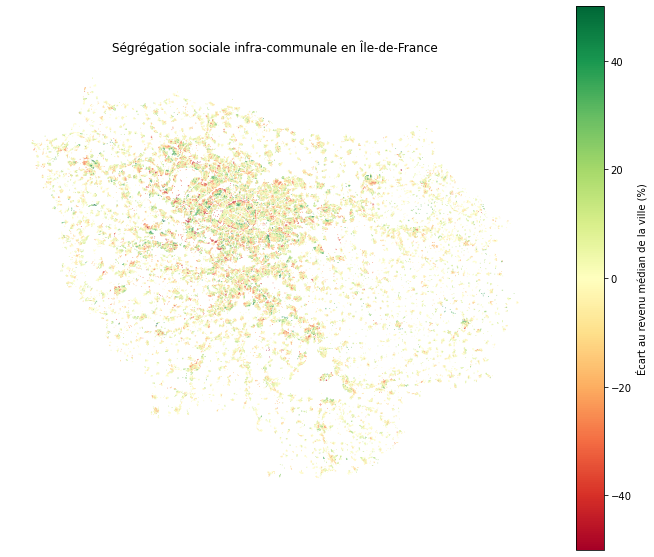

In [32]:
# Calcul du niveau de vie moyen par personne dans chaque carreau
df['niveau_de_vie_unitaire'] = df['ind_snv'] / df['ind']

# Calcul de la médiane de ce niveau de vie pour chaque ville
df['ville_niveau_vie_median'] = df.groupby('nom')['niveau_de_vie_unitaire'].transform('median')

# Calculer l'écart relatif (en %) pour voir la ségrégation
df['ecart_segregation_pct'] = (df['niveau_de_vie_unitaire'] - df['ville_niveau_vie_median']) / df['ville_niveau_vie_median'] * 100

import matplotlib.pyplot as plt

# Création de la figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Affichage des carreaux
# On définit vmin et vmax de façon symétrique (ex: -50% à +50%)
df.plot(column='ecart_segregation_pct', 
         cmap='RdYlGn', 
         legend=True, 
         ax=ax,
         vmin=-50,  # Force le rouge à partir de -50%
         vmax=50,   # Force le vert à partir de +50%
         legend_kwds={'label': "Écart au revenu médian de la ville (%)"},
         edgecolor='none')    # Enlever les bordures pour fluidifier la carte

ax.set_title("Ségrégation sociale infra-communale en Île-de-France")
ax.axis('off') # Cache les coordonnées GPS pour plus d'esthétisme
plt.show()

Cette carte met en lumière la géographie des écarts du niveau de vie au sein de chaque commune d'Ile de France.

Pour plus de clarté, on peut se concentrer sur la patite couronne de Paris.

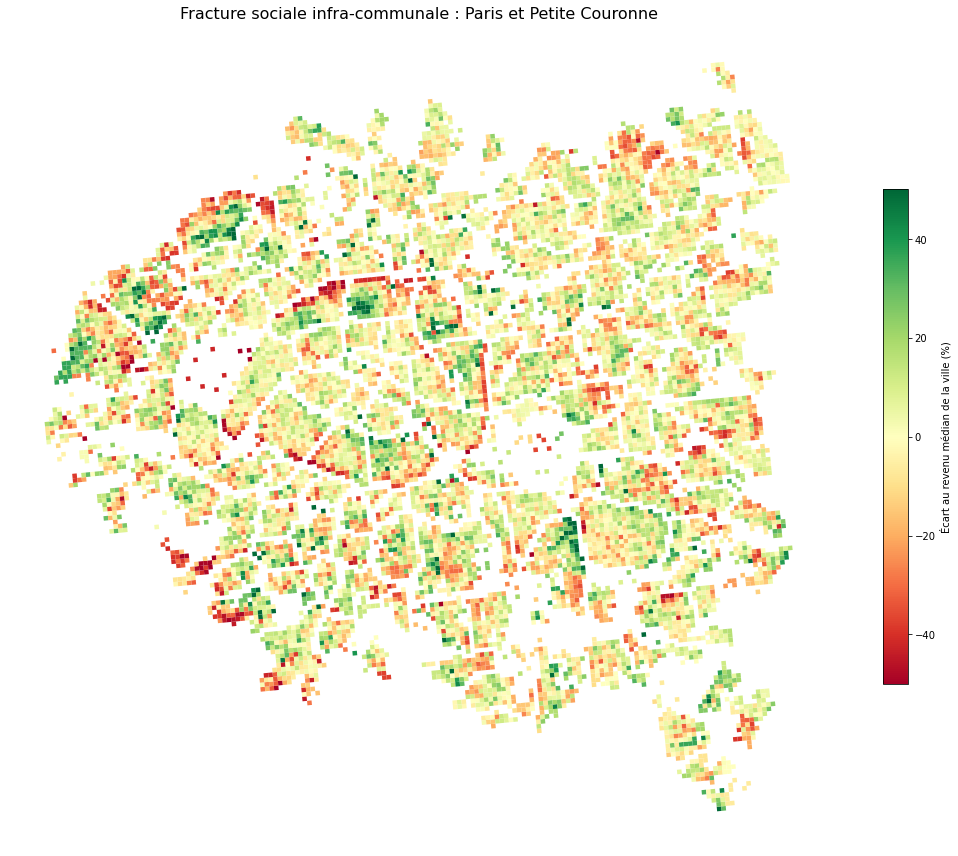

In [37]:
import matplotlib.pyplot as plt

# Liste des départements de Paris et de la petite couronne
petite_couronne = [75, 92, 93, 94]
df_paris_pc = df[df["codeDepartement"].isin(petite_couronne)]


fig, ax = plt.subplots(1, 1, figsize=(15, 12))

df_paris_pc.plot(column='ecart_segregation_pct', 
                 cmap='RdYlGn', 
                 legend=True, 
                 ax=ax,
                 vmin=-50,  
                 vmax=50,   
                 legend_kwds={'label': "Écart au revenu médian de la ville (%)", 'shrink': 0.6},
                 edgecolor='none')

ax.set_title("Fracture sociale infra-communale : Paris et Petite Couronne", fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

Une fois les indicateurs construits, nous analysons les corrélations linéaires entre les niveaux de pollution atmosphérique et l’écart de richesse relative, afin d’explorer l’existence d’une relation statistique entre ségrégation socio-économique et exposition à la pollution.



In [38]:
import numpy as np
import statsmodels.api as sm

#Nettoyage des données
colonnes_reg = ['ecart_segregation_pct', 'no2', 'pm10', 'pm25']
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=colonnes_reg)

def analyser_correlation(polluant, df):
    #Préparation des données (X = écart de revenu, Y = pollution)
    X = df['ecart_segregation_pct']
    Y = df[polluant]
    
    #Ajout d'une constante pour l'ordonnée à l'origine
    X = sm.add_constant(X)
    
    #Création et entraînement du modèle OLS
    modele = sm.OLS(Y, X).fit()
    
    print(f"--- Analyse pour le {polluant.upper()} ---")
    
    print(f"Coefficient (pente) : {modele.params.iloc[1]:.4f}")
    print(f"R-squared : {modele.rsquared:.4f}")
    print(f"P-value : {modele.pvalues.iloc[1]:.4e}") 
    
    print("-" * 30)
    return modele

#Exécution pour les 3 polluants
for p in ['no2', 'pm10', 'pm25']:
    analyser_correlation(p, df_clean)

--- Analyse pour le NO2 ---
Coefficient (pente) : -0.0272
R-squared : 0.0020
P-value : 1.5226e-28
------------------------------
--- Analyse pour le PM10 ---
Coefficient (pente) : 0.0007
R-squared : 0.0000
P-value : 3.2417e-01
------------------------------
--- Analyse pour le PM25 ---
Coefficient (pente) : -0.0024
R-squared : 0.0007
P-value : 3.8854e-11
------------------------------


L’analyse statistique met en évidence des différences marquées selon la nature des polluants. Le dioxyde d’azote ($NO_2$), polluant principalement associé au trafic routier, présente la corrélation la plus forte et la plus significative ($p$-value $< 10^{-27}$) avec l’écart de richesse relative. Les carreaux relativement plus défavorisés au sein de leur commune sont ainsi associés à des niveaux de $NO_2$ plus élevés.

Une relation similaire, bien que moins marquée, est également observée pour les particules fines ($PM_{2.5}$). En revanche, l’absence de corrélation significative pour les particules plus grossières ($PM_{10}$) suggère que les inégalités d’exposition à la pollution en Île-de-France sont principalement liées aux sources de pollution locales, en particulier aux infrastructures routières, dont le $NO_2$ constitue un marqueur privilégié.


### 2- Ajout des axes routiers dans l'analyse

L’intérêt porté aux axes routiers est central, car ils constituent une source majeure de pollution atmosphérique en milieu urbain, en particulier pour les polluants liés au trafic routier. Contrairement à une pollution de fond, relativement diffuse, la pollution liée au trafic est fortement localisée, avec des concentrations élevées à proximité immédiate des infrastructures routières.

S’intéresser spécifiquement à ces axes permet ainsi d’explorer l’existence d’une ségrégation socio-spatiale potentielle. En effet, la proximité aux nuisances environnementales (pollution, bruit) peut influencer la valeur foncière et les choix résidentiels, ce qui pourrait conduire certaines populations plus modestes à être davantage exposées à ces sources de pollution.

Nous ajoutons donc dans le dataframe une variable indiquant la proximité à un axe routier. Concrètement, nous construisons une zone tampon de 100 mètres de part et d’autre des axes routiers et identifions les carreaux intersectant cette zone.


In [39]:
import osmnx as ox
import geopandas as gpd
import os

def recuperer_routes_idf():
    # Définition du chemin relatif vers data/raw
    # On part du dossier /notebooks, on remonte (..) puis on descend dans /data/raw
    chemin_dossier_raw = os.path.join("..", "data", "raw")
    chemin_fichier = os.path.join(chemin_dossier_raw, "routes_idf.gpkg")

    # Vérification si le fichier existe déjà
    if os.path.exists(chemin_fichier):
        print(f"Chargement des routes depuis le fichier local : {chemin_fichier}")
        routes_idf = gpd.read_file(chemin_fichier)
    else:
        # Code de récupération si le fichier n'est pas trouvé
        print("Fichier local non trouvé. Récupération des routes via OSMnx en cours...")
        
        mes_axes = ["motorway", "trunk", "primary", "secondary"]
        
        # Téléchargement
        routes_idf = ox.features_from_place("Île-de-France, France", tags={"highway": mes_axes})
        
        # Filtrage des géométries
        routes_idf = routes_idf[routes_idf.geometry.type.isin(['LineString', 'MultiLineString'])]
        
        print(f"Terminé ! {len(routes_idf)} segments récupérés via internet.")
    

    return routes_idf


base_routes = recuperer_routes_idf()

# Standardisation de l'index 
base_routes = base_routes.reset_index()

df = df.to_crs(epsg=2154)
base_routes = base_routes.to_crs(epsg=2154)

# Création de la zone de 100m
distance_influence = 100 
routes_buffer = base_routes.copy()
routes_buffer['geometry'] = base_routes.buffer(distance_influence)

# Jointure spatiale
carreaux_qui_touchent = gpd.sjoin(df, routes_buffer, how="inner", predicate="intersects")

# Mise à jour des indices exposés
indices_exposes = carreaux_qui_touchent.index.unique()
df['proche_axe_majeur'] = False
df.loc[indices_exposes, 'proche_axe_majeur'] = True

print(f"Analyse terminée : {df['proche_axe_majeur'].sum()} carreaux identifiés comme proches d'un axe.")

ModuleNotFoundError: No module named 'osmnx'

Géographiqument, que nous donne la répartition de la qualité de l'air en Ile de France?

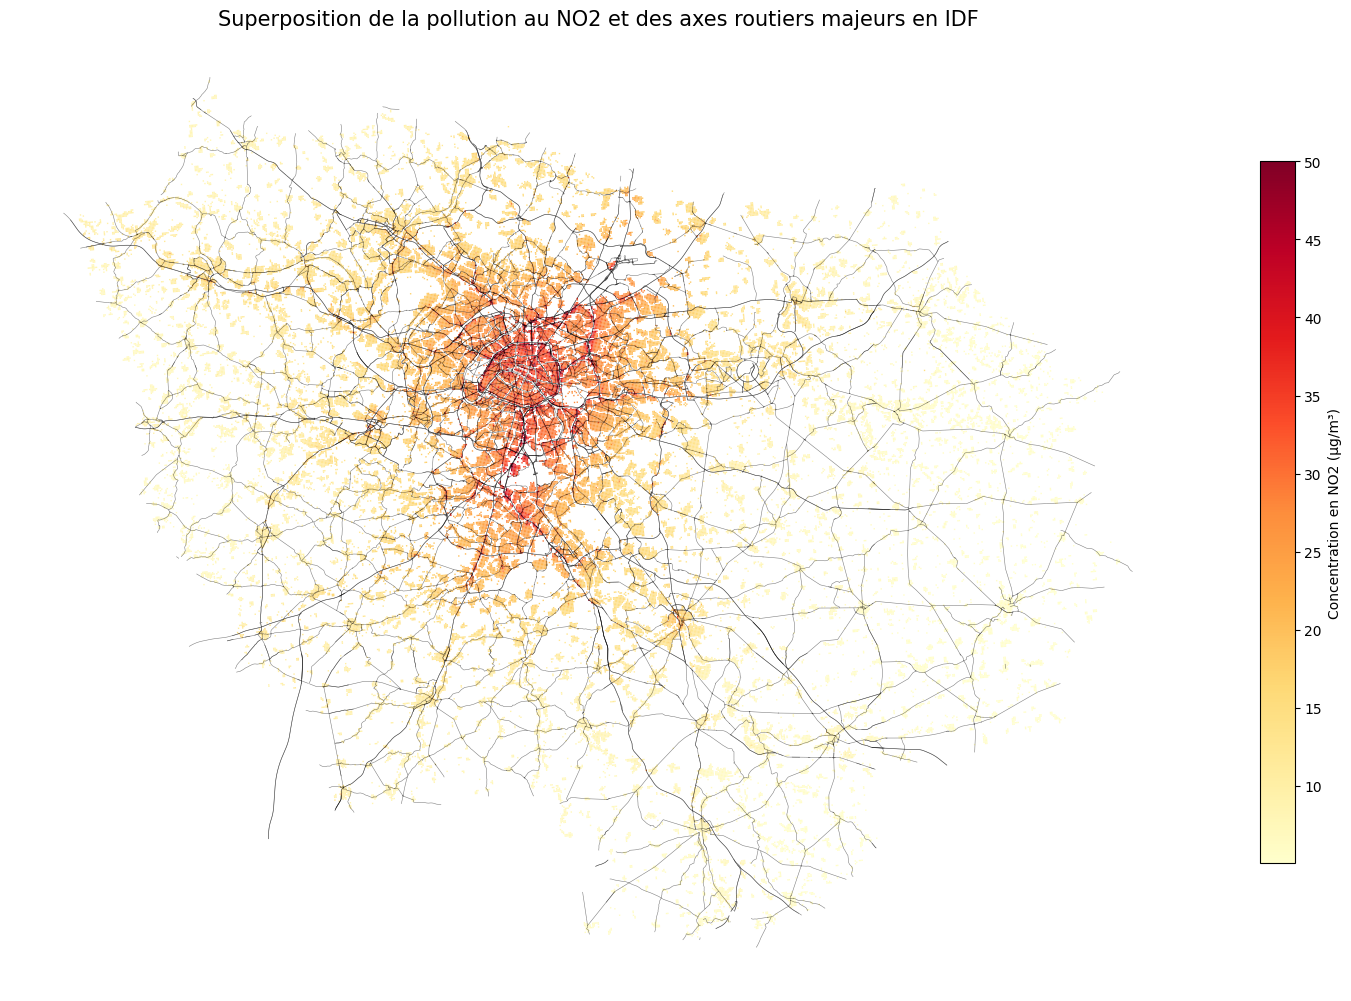

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# On utilise df qui contient tes données de pollution et de géométrie
df.plot(column='no2', 
         cmap='YlOrRd', 
         legend=True, 
         ax=ax,
         vmax=50, 
         legend_kwds={'label': "Concentration en NO2 (µg/m³)", 'shrink': 0.6},
         edgecolor='none')

# On rajoute les axes routiers par-dessus
base_routes.plot(ax=ax, 
                 color='black', 
                 linewidth=0.4, 
                 alpha=0.5, 
                 label="Axes routiers majeurs")

ax.set_title("Superposition de la pollution au NO2 et des axes routiers majeurs en IDF", fontsize=15)
ax.axis('off')

plt.tight_layout()
plt.show()

Afin d’illustrer plus finement le lien entre pollution atmosphérique et proximité aux axes routiers, nous réalisons un zoom sur quelques communes d’Île-de-France.  
Les villes de Saint-Denis, Aubervilliers, Saint-Ouen-sur-Seine, Nanterre et Gennevilliers sont retenues, car elles sont traversées par des infrastructures routières majeures (notamment l’A1 et l’A86), qui structurent fortement l’espace urbain.

Dans ces communes, la présence d’autoroutes découpant le tissu urbain permet d’observer plus clairement la concentration de la pollution à proximité immédiate des axes routiers, comparativement à des zones où la pollution est plus diffuse.


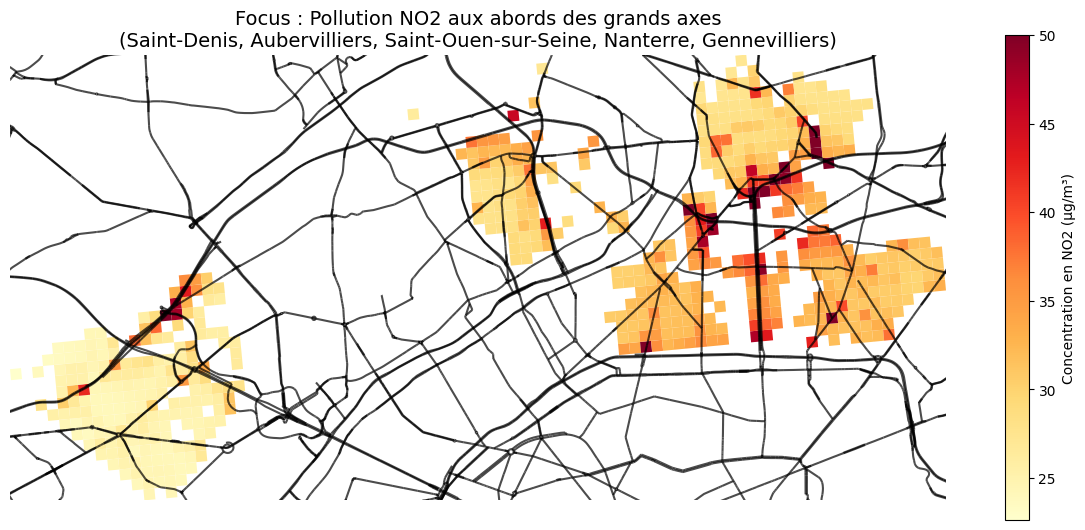

In [ ]:
import matplotlib.pyplot as plt

#Sélection des villes cibles (exemples frappants d'injustice environnementale)
villes_cibles = ['Saint-Denis', 'Aubervilliers', 'Saint-Ouen-sur-Seine', 'Nanterre', 'Gennevilliers']

#Filtrer les données pour ces villes
df_zoom = df[df['nom'].isin(villes_cibles)]

#On filtre les routes pour n'afficher que celles qui traversent ces villes
bounds = df_zoom.total_bounds  
routes_zoom = base_routes.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

df_zoom.plot(column='no2', 
             cmap='YlOrRd', 
             legend=True, 
             ax=ax,
             vmax=50,
             legend_kwds={'label': "Concentration en NO2 (µg/m³)", 'shrink': 0.5},
             edgecolor='none')

routes_zoom.plot(ax=ax, 
                 color='black', 
                 linewidth=1.5, 
                 alpha=0.7, 
                 label="Axes routiers majeurs")

for x, y, label in zip(df_zoom.geometry.centroid.x, df_zoom.geometry.centroid.y, df_zoom['nom']):
    pass

ax.set_title(f"Focus : Pollution NO2 aux abords des grands axes\n({', '.join(villes_cibles)})", fontsize=14)
ax.set_axis_off()

ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

plt.tight_layout()
plt.show()

Cette analyse permet d’évaluer si l’hypothèse d’une ségrégation socio-spatiale se retrouve empiriquement dans les données.  
Pour ce faire, nous mobilisons d’abord une approche cartographique afin de visualiser la répartition spatiale des écarts de niveau de vie relatif, puis nous comparons la moyenne de ces écarts entre les zones situées à proximité des axes routiers et celles qui en sont éloignées.


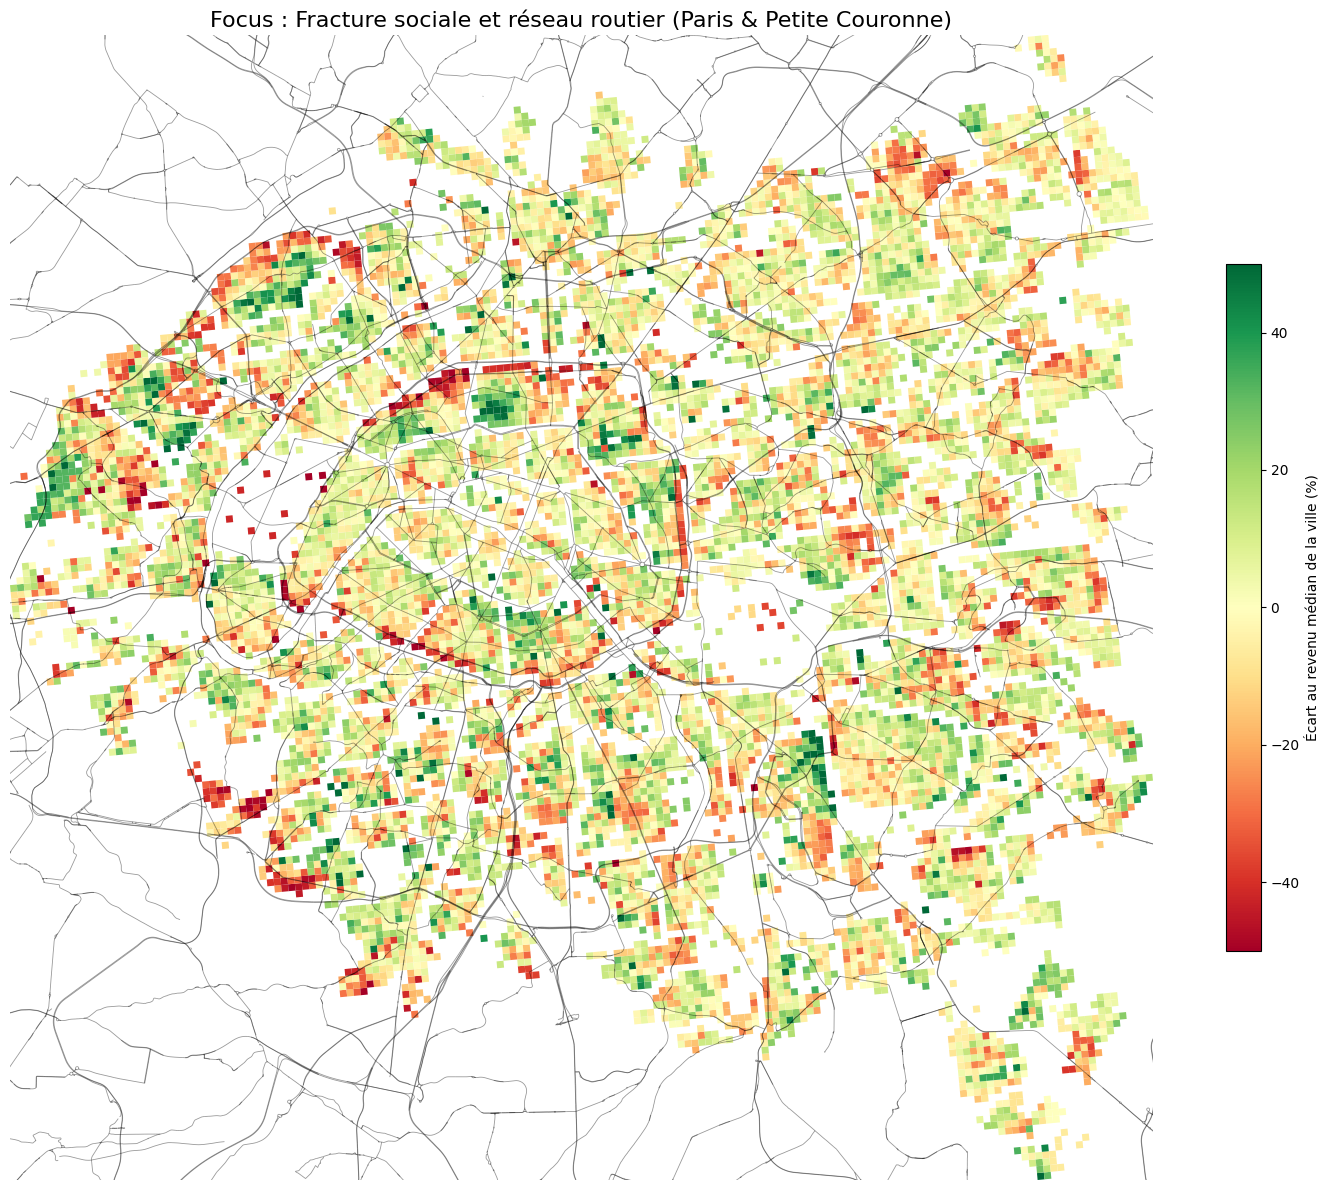

In [ ]:
import matplotlib.pyplot as plt

#Liste des départements de Paris et de la petite couronne
petite_couronne = ['75', '92', '93', '94']
df_paris_pc = df[df['codeDepartement'].isin(petite_couronne)]

#On récupère les coordonnées min et max des carreaux de la petite couronne
minx, miny, maxx, maxy = df_paris_pc.total_bounds

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

df_paris_pc.plot(column='ecart_segregation_pct', 
                 cmap='RdYlGn', 
                 legend=True, 
                 ax=ax,
                 vmin=-50, 
                 vmax=50,
                 legend_kwds={'label': "Écart au revenu médian de la ville (%)", 'shrink': 0.6},
                 edgecolor='none',
                 zorder=1) # On le met au premier niveau

#Cette fois, on ajoute des routes pour voir la corrélation visuelle
base_routes.plot(ax=ax, 
                 color='black', 
                 linewidth=0.6, 
                 alpha=0.4, 
                 zorder=2) 

#On force le zoom sur les limites de la petite couronne
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title("Focus : Fracture sociale et réseau routier (Paris & Petite Couronne)", fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

La carte met en évidence l’existence de zones où la proximité à un axe routier est associée à une pauvreté relative plus marquée au sein de la commune.  
Ces configurations apparaissent de manière particulièrement nette dans certaines villes, et notamment à Paris, où les carreaux situés à proximité du boulevard périphérique présentent fréquemment des niveaux de vie relatifs inférieurs à la médiane communale.

Cette observation suggère que les grandes infrastructures routières peuvent constituer des lignes de fracture socio-spatiale, en concentrant à la fois des nuisances environnementales et des populations relativement plus défavorisées, au moins dans certains contextes urbains.


In [ ]:

# On sépare en deux groupes
colonnes_reg = ['ecart_segregation_pct', 'no2', 'pm10', 'pm25']
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=colonnes_reg)
df_proche = df_clean[df_clean['proche_axe_majeur'] == True]
df_loin = df_clean[df_clean['proche_axe_majeur'] == False]

comparaison_moyenne = df_clean.groupby('proche_axe_majeur')['ecart_segregation_pct'].mean()
print(comparaison_moyenne)

proche_axe_majeur
False    1.024853
True    -2.268421
Name: ecart_segregation_pct, dtype: float64


La comparaison des écarts moyens au niveau de vie médian met en évidence une différenciation nette entre les zones situées à proximité des axes routiers majeurs et celles qui en sont éloignées.

Les carreaux éloignés des grands axes présentent en moyenne un niveau de vie supérieur de 1,02 % à la médiane de leur commune, tandis que les carreaux situés à moins de 100 mètres d’un axe routier majeur affichent un niveau de vie moyen inférieur de 2,27 % à cette médiane. L’écart entre ces deux groupes atteint ainsi près de 3,3 points de pourcentage, ce qui constitue une différence notable à l’échelle de la population étudiée.

Ces résultats suggèrent que la proximité aux infrastructures de transport est associée à des différences systématiques de niveau de vie relatif au sein des communes. Ils sont compatibles avec l’hypothèse d’une ségrégation socio-spatiale, dans laquelle les nuisances environnementales liées au trafic routier coïncident avec des zones relativement plus défavorisées, sans permettre toutefois d’établir un lien causal.


In [ ]:
#Filtrer df_clean pour ne garder que Paris
df_paris = df_clean[df_clean['codeDepartement'] == '75']

df_paris_proche = df_paris[df_paris['proche_axe_majeur'] == True]
df_paris_loin = df_paris[df_paris['proche_axe_majeur'] == False]

comparaison_moyenne_paris = df_paris.groupby('proche_axe_majeur')['ecart_segregation_pct'].mean()

print("--- Analyse de la ségrégation à PARIS (75) ---")
print(comparaison_moyenne_paris)


--- Analyse de la ségrégation à PARIS (75) ---
proche_axe_majeur
False    3.264048
True    -1.666329
Name: ecart_segregation_pct, dtype: float64


L’analyse restreinte à Paris met en évidence une différenciation encore plus marquée entre les zones situées à proximité des axes routiers et celles qui en sont éloignées.  
Les carreaux situés à plus de 100 mètres d’un axe routier présentent en moyenne un niveau de vie relatif supérieur de 3,26 % à la médiane parisienne, tandis que ceux situés à moins de 100 mètres affichent un niveau de vie inférieur de 1,67 % à cette médiane.

L’écart entre ces deux groupes atteint ainsi près de 4,8 points de pourcentage, soit une différence plus prononcée que celle observée à l’échelle régionale. Ce résultat suggère que les mécanismes de différenciation socio-spatiale associés aux infrastructures routières sont particulièrement marqués dans un contexte urbain dense comme celui de Paris.


Calcul des distances... (patience)


C:\Users\quent\AppData\Local\Temp\ipykernel_9620\4279379824.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union_routes = base_routes.unary_union


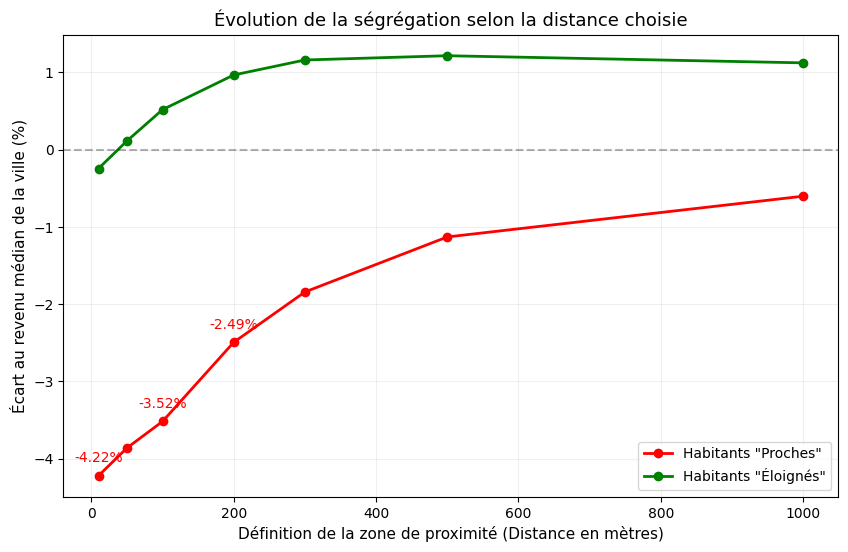

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculer la distance de chaque carreau à la route 
print("Calcul des distances... (patience)")
union_routes = base_routes.unary_union
df_clean['dist_route'] = df_clean.geometry.centroid.distance(union_routes)

#On teste de 10 à 1km
distances_test = [10, 50, 100, 200, 300, 500, 1000]
data_plot = []

for d in distances_test:
    #On sépare en deux groupes selon la distance d
    proche = df_clean[df_clean['dist_route'] <= d]
    loin = df_clean[df_clean['dist_route'] > d]
    
    # On calcule la moyenne de l'écart de revenu pour chaque groupe
    moy_proche = proche['ecart_segregation_pct'].mean()
    moy_loin = loin['ecart_segregation_pct'].mean()
    
    data_plot.append({
        'Distance': d, 
        'Proche des axes': moy_proche, 
        'Eloigné des axes': moy_loin
    })

df_res = pd.DataFrame(data_plot)

plt.figure(figsize=(10, 6))
plt.plot(df_res['Distance'], df_res['Proche des axes'], marker='o', label='Habitants "Proches"', color='red', linewidth=2)
plt.plot(df_res['Distance'], df_res['Eloigné des axes'], marker='o', label='Habitants "Éloignés"', color='green', linewidth=2)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3) # Ligne de la médiane ville
plt.xlabel("Définition de la zone de proximité (Distance en mètres)", fontsize=11)
plt.ylabel("Écart au revenu médian de la ville (%)", fontsize=11)
plt.title("Évolution de la ségrégation selon la distance choisie", fontsize=13)
plt.legend()
plt.grid(True, alpha=0.2)


for dist in [10, 100, 200]:
    val = df_res[df_res['Distance'] == dist]['Proche des axes'].values[0]
    plt.annotate(f"{val:.2f}%", (dist, val), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.show()

Cette figure montre que l’ampleur des écarts de niveau de vie relatifs dépend fortement de la définition retenue pour la proximité aux axes routiers.  
Lorsque l’analyse se concentre sur les individus vivant à très courte distance des infrastructures routières, les différences de niveau de vie avec les populations plus éloignées apparaissent nettement plus marquées.

En particulier, pour un seuil de 100 mètres, l’écart moyen de niveau de vie relatif entre les populations proches et éloignées atteint environ 4 points de pourcentage. À mesure que le seuil de distance est élargi, cet écart tend à se réduire, suggérant que les mécanismes de différenciation socio-spatiale sont particulièrement localisés à proximité immédiate des axes routiers.


Nous examinons désormais les coefficients $\beta$ issus des régressions linéaires estimées séparément sur les deux échantillons — zones proches et zones éloignées des axes routiers — en conservant la même méthode de séparation que précédemment.


Distance   | Beta Proche (std) | Beta Loin (std) | P-val Proche
---------------------------------------------------------------------------
10        m |          -0.0718 |        -0.0383 |     4.89e-03
50        m |          -0.0417 |        -0.0259 |     5.18e-04
100       m |          -0.0452 |        -0.0107 |     3.07e-07
200       m |          -0.0425 |         0.0108 |     1.51e-10
300       m |          -0.0357 |         0.0190 |     6.13e-10
500       m |          -0.0326 |         0.0194 |     7.21e-11
1000      m |          -0.0384 |         0.0339 |     4.06e-18


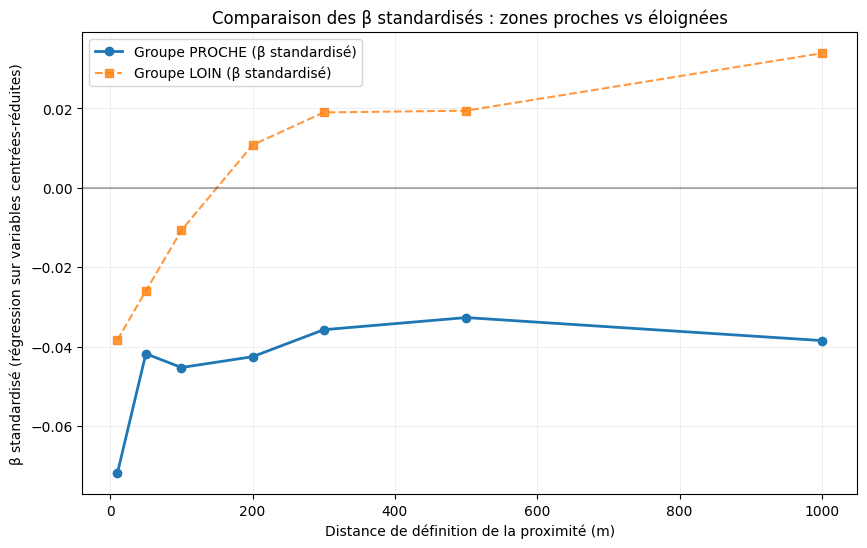

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Helper: standardize safely ---
def zscore(s: pd.Series) -> pd.Series:
    s = s.astype(float)
    std = s.std(ddof=0)
    if std == 0 or np.isnan(std):
        return s * np.nan  # will lead to dropna -> empty regression
    return (s - s.mean()) / std

# Préparation des distances
distances_test = [10, 50, 100, 200, 300, 500, 1000]
resultats_comparaison = []

print(f"{'Distance':<10} | {'Beta Proche (std)':<16} | {'Beta Loin (std)':<14} | {'P-val Proche'}")
print("-" * 75)

for d in distances_test:
    # Séparation des deux groupes
    df_p = df_clean[df_clean["dist_route"] <= d].copy()
    df_l = df_clean[df_clean["dist_route"] > d].copy()

    # --- Groupe PROCHE : standardized beta ---
    y_p = zscore(df_p["no2"])
    x_p = zscore(df_p["ecart_segregation_pct"])
    tmp_p = pd.concat([y_p, x_p], axis=1).dropna()
    if len(tmp_p) >= 3:
        X_p = sm.add_constant(tmp_p["ecart_segregation_pct"])
        mod_p = sm.OLS(tmp_p["no2"], X_p).fit()
        beta_p = mod_p.params["ecart_segregation_pct"]   # beta standardisé
        pval_p = mod_p.pvalues["ecart_segregation_pct"]
    else:
        beta_p, pval_p = np.nan, np.nan

    # --- Groupe LOIN : standardized beta ---
    y_l = zscore(df_l["no2"])
    x_l = zscore(df_l["ecart_segregation_pct"])
    tmp_l = pd.concat([y_l, x_l], axis=1).dropna()
    if len(tmp_l) >= 3:
        X_l = sm.add_constant(tmp_l["ecart_segregation_pct"])
        mod_l = sm.OLS(tmp_l["no2"], X_l).fit()
        beta_l = mod_l.params["ecart_segregation_pct"]   # beta standardisé
        pval_l = mod_l.pvalues["ecart_segregation_pct"]
    else:
        beta_l, pval_l = np.nan, np.nan

    resultats_comparaison.append({
        "distance": d,
        "beta_proche_std": beta_p,
        "beta_loin_std": beta_l,
        "p_proche": pval_p,
        "p_loin": pval_l,
        "n_proche": len(tmp_p),
        "n_loin": len(tmp_l),
    })

    print(f"{d:<10}m | {beta_p:>16.4f} | {beta_l:>14.4f} | {pval_p:>12.2e}")

# DataFrame résultats
res_df = pd.DataFrame(resultats_comparaison)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(res_df["distance"], res_df["beta_proche_std"], "o-", label="Groupe PROCHE (β standardisé)", linewidth=2)
plt.plot(res_df["distance"], res_df["beta_loin_std"], "s--", label="Groupe LOIN (β standardisé)", alpha=0.8)

plt.axhline(y=0, color="black", linestyle="-", alpha=0.3)
plt.xlabel("Distance de définition de la proximité (m)")
plt.ylabel("β standardisé (régression sur variables centrées-réduites)")
plt.title("Comparaison des β standardisés : zones proches vs éloignées")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()


### L'effet « Marqueur » de la route (Le basculement du signe)
L’analyse des coefficients $\beta$ estimés sur l’échantillon des zones éloignées met en évidence un basculement du signe selon la distance retenue pour définir la proximité aux axes routiers.  
Pour des seuils de 10, 50 et 100 mètres, le coefficient associé à l’écart de richesse relative est négatif. À partir d’un seuil de 200 mètres, ce coefficient devient positif (environ +0,0056) et augmente progressivement jusqu’à +0,0127 pour un seuil de 1 000 mètres.

Ce changement de signe suggère que, lorsque les zones situées à proximité immédiate des axes routiers sont exclues, la relation entre pollution et niveau de vie relatif s’inverse : les zones relativement plus favorisées au sein des communes apparaissent alors associées à des niveaux de pollution plus élevés. Ce résultat est compatible avec un effet de centralité urbaine, dans lequel les quartiers centraux, souvent plus aisés et plus denses, sont également plus exposés à une pollution de fond liée à l’activité urbaine.

La proximité immédiate des infrastructures routières semble ainsi jouer un rôle clé dans la structuration des inégalités environnementales observées, en modifiant la relation entre pollution et niveau de vie relatif.


### Le « Pic d'Injustice »
L’intensité maximale de cette relation est observée pour les distances les plus faibles.  
À un seuil de 10 mètres, le coefficient $\beta$ estimé pour le groupe des zones proches atteint −0,0691, soit la valeur absolue la plus élevée parmi les seuils testés. Ce coefficient est associé à une p-value très faible ($4{,}89 \times 10^{-3}$), indiquant une relation statistiquement significative.

Ce résultat suggère que les inégalités de niveau de vie relatives associées à l’exposition à la pollution sont particulièrement marquées à très courte distance des axes routiers, où se concentrent les nuisances environnementales les plus fortes.

 
 
### La « Dilution » de la preuve 
À mesure que le seuil de distance définissant la proximité aux axes routiers est élargi, le coefficient $\beta$ estimé pour les zones proches diminue progressivement en valeur absolue (de −0,069 à −0,033, puis −0,028 et −0,019).  

Cette évolution indique que l’élargissement du périmètre de proximité conduit à agréger des zones très fortement exposées avec des zones moins concernées par les nuisances routières, ce qui atténue le signal observé. Les inégalités environnementales mises en évidence apparaissent ainsi fortement localisées et relèvent d’un phénomène de micro-proximité, concentré dans les premières dizaines — voire centaines — de mètres autour des infrastructures routières.


L’ensemble de ces résultats est compatible avec l’existence d’un phénomène de « double exposition », dans lequel certaines populations cumulent un niveau de vie relatif plus faible et une exposition accrue à la pollution atmosphérique en raison de leur proximité aux axes routiers.

Cette configuration suggère que les nuisances environnementales liées au trafic routier tendent à se concentrer dans des zones relativement plus défavorisées au sein des communes, conduisant à une superposition des inégalités sociales et environnementales, sans permettre toutefois d’établir un lien causal.


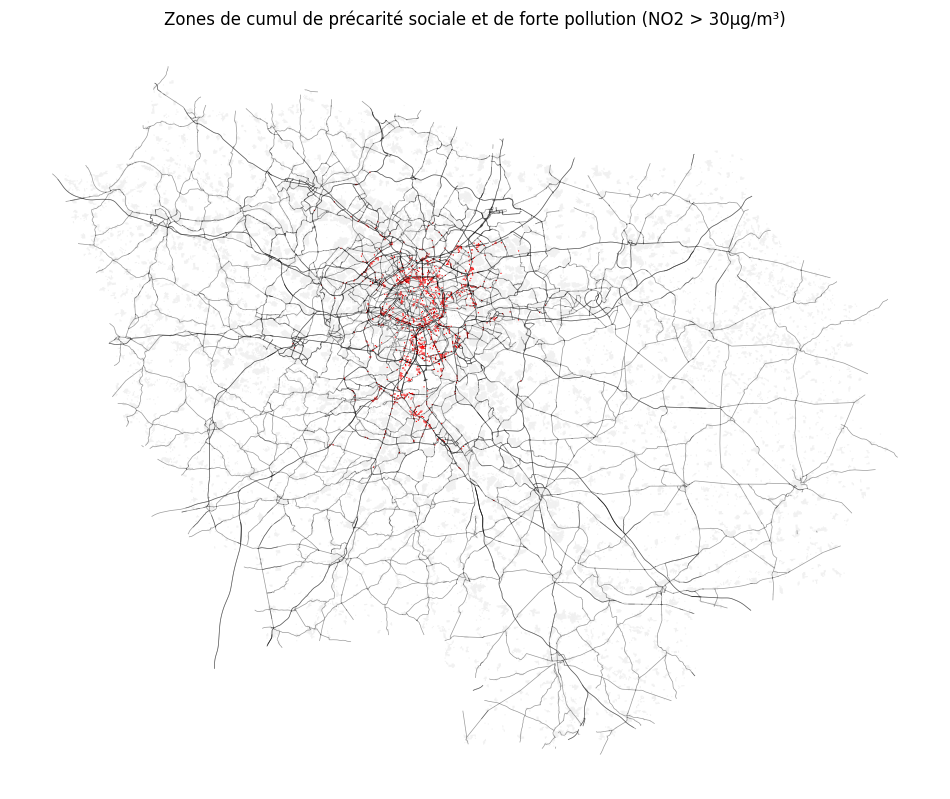

In [ ]:
# On crée une colonne 'double_peine'
#Critère : Écart de revenu < -12% ET NO2 > 30
df['double_peine'] = (df['ecart_segregation_pct'] < -12) & (df['no2'] > 30)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

df.plot(ax=ax, color='lightgrey', edgecolor='none', alpha=0.3)

#On affiche en rouge vif uniquement les zones de "double peine"
df[df['double_peine'] == True].plot(ax=ax, color='red', edgecolor='none', label="Zones de Double Peine")

base_routes.plot(ax=ax, color='black', linewidth=0.5, alpha=0.4)

ax.set_title("Zones de cumul de précarité sociale et de forte pollution (NO2 > 30µg/m³)")
ax.axis('off')
plt.show()